<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 1: Load the dataset


In [22]:
df = pd.read_csv('../Module_2_Data_Wrangling/survey_data.csv')
df

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65432,65433,I am a developer by profession,18-24 years old,"Employed, full-time",Remote,Apples,Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","On the job training;School (i.e., University, ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65433,65434,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65434,65435,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Stack Overflow;Social ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65435,65436,I am a developer by profession,18-24 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Profe...,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




In [24]:
df_clean = df[["Age", "JobSatPoints_6"]].dropna()
df_clean

,Age,JobSatPoints_6
1,35-44 years old,0.0
10,35-44 years old,25.0
12,35-44 years old,30.0
15,45-54 years old,0.0
18,25-34 years old,60.0
...,...,...
65178,45-54 years old,0.0
65218,25-34 years old,0.0
65265,18-24 years old,60.0
65351,25-34 years old,0.0


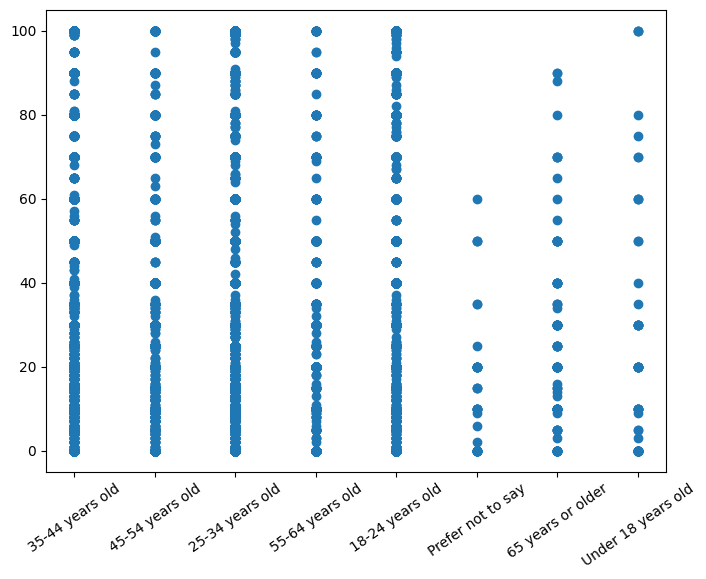

In [26]:
plt.figure(figsize=(8,6))
plt.scatter(df_clean['Age'], df_clean['JobSatPoints_6'])
plt.xticks(rotation=35)
plt.show()

#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


In [38]:
df_conv = df[['ConvertedCompYearly', 'JobSatPoints_6']].dropna()
Q1 = df_conv['ConvertedCompYearly'].quantile(0.25)
Q3 = df_conv['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df_conv = df_conv[(df_conv['ConvertedCompYearly'] >= lower) & (df_conv['ConvertedCompYearly'] <= upper)]
df_conv

,ConvertedCompYearly,JobSatPoints_6
72,7322.0,65.0
379,91295.0,0.0
389,110000.0,20.0
392,161044.0,30.0
398,195000.0,30.0
...,...,...
41175,15637.0,20.0
41178,9711.0,80.0
41180,44640.0,0.0
41184,170000.0,20.0


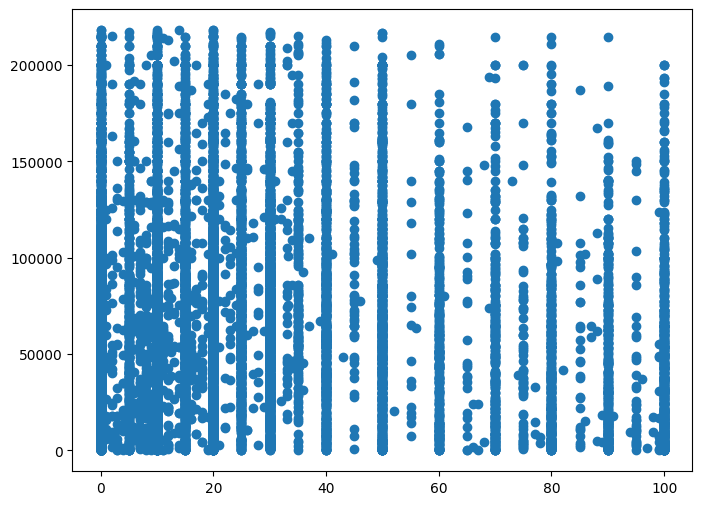

In [41]:
plt.figure(figsize=(8,6))
plt.scatter(df_conv['JobSatPoints_6'], df_conv['ConvertedCompYearly'])
plt.show()

### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


In [57]:
df['Age'].value_counts()

Age
25-34 years old       23911
35-44 years old       14942
18-24 years old       14098
45-54 years old        6249
55-64 years old        2575
Under 18 years old     2568
65 years or older       772
Prefer not to say       322
Name: count, dtype: int64

In [56]:
age_job = df[['Age', 'JobSatPoints_6']].dropna()
def get_age(age):
    if age == '25-34 years old':
        return 30
    elif age == '35-44 years old':
        return 40
    elif age == '18-24 years old':
        return 21
    elif age == '45-54 years old':
        return 50
    elif age == '55-64 years old':
        return 60
    elif age == 'Under 18 years old':
        return 16
    elif age == '65 years or older':
        return 66
    elif age == 'Prefer not to say':
        return 25
    
age_job['Age'] = age_job['Age'].apply(get_age)
age_job

,Age,JobSatPoints_6
1,40,0.0
10,40,25.0
12,40,30.0
15,50,0.0
18,30,60.0
...,...,...
65178,50,0.0
65218,30,0.0
65265,21,60.0
65351,30,0.0


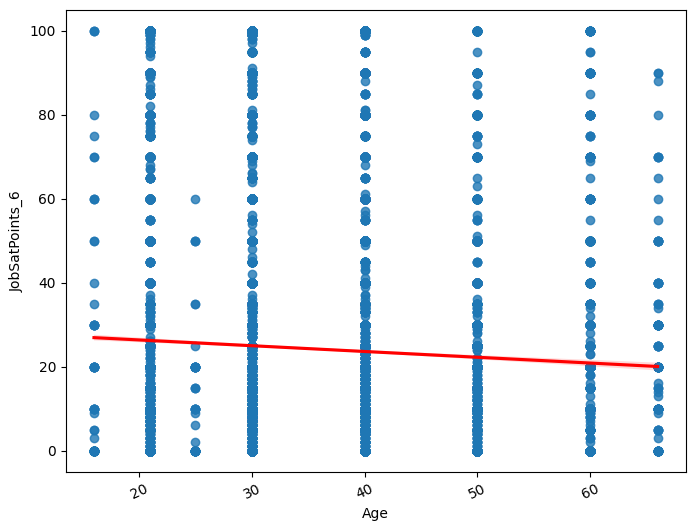

In [55]:
plt.figure(figsize=(8,6))
sns.regplot(data=age_job, x='Age', y='JobSatPoints_6', line_kws={'color':'red'})
plt.xticks(rotation=25)
plt.show()

#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


In [58]:
df_exp = df[['Age', 'YearsCodePro']].dropna()
df_exp

,Age,YearsCodePro
1,35-44 years old,17
2,45-54 years old,27
6,35-44 years old,7
9,35-44 years old,11
11,45-54 years old,25
...,...,...
65428,25-34 years old,7
65431,45-54 years old,24
65432,18-24 years old,3
65434,25-34 years old,5


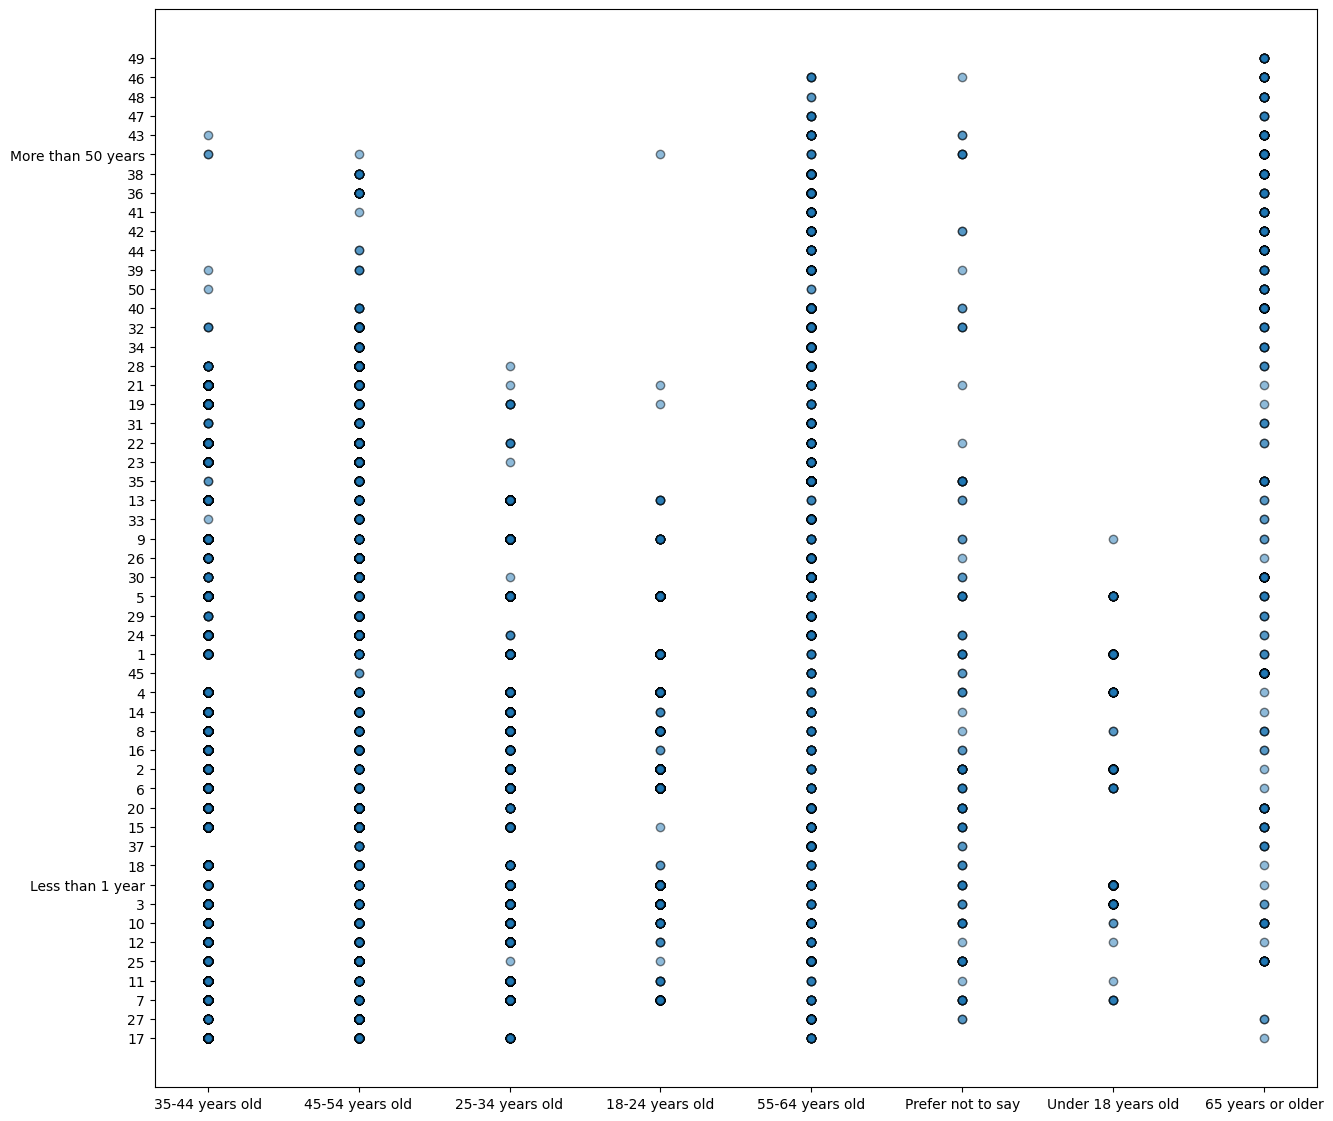

In [62]:
plt.figure(figsize=(15,14))
plt.scatter(df_exp['Age'], df_exp['YearsCodePro'], alpha=0.5, edgecolor="k")
plt.show()

### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


In [65]:
con_job_age = df[['Age', 'JobSatPoints_6', 'ConvertedCompYearly']].dropna()
con_job_age['Age'] = con_job_age['Age'].apply(get_age)
con_job_age

,Age,JobSatPoints_6,ConvertedCompYearly
72,21,65.0,7322.0
379,40,0.0,91295.0
389,30,20.0,110000.0
392,40,30.0,161044.0
398,50,30.0,195000.0
...,...,...,...
41178,21,80.0,9711.0
41180,30,0.0,44640.0
41184,50,20.0,170000.0
41186,21,20.0,12000.0


In [68]:
Q1 = con_job_age['ConvertedCompYearly'].quantile(0.25)
Q3 = con_job_age['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
jobs = con_job_age[(con_job_age['ConvertedCompYearly'] >= lower) & (con_job_age['ConvertedCompYearly'] <= upper)]
jobs

,Age,JobSatPoints_6,ConvertedCompYearly
72,21,65.0,7322.0
379,40,0.0,91295.0
389,30,20.0,110000.0
392,40,30.0,161044.0
398,50,30.0,195000.0
...,...,...,...
41175,21,20.0,15637.0
41178,21,80.0,9711.0
41180,30,0.0,44640.0
41184,50,20.0,170000.0


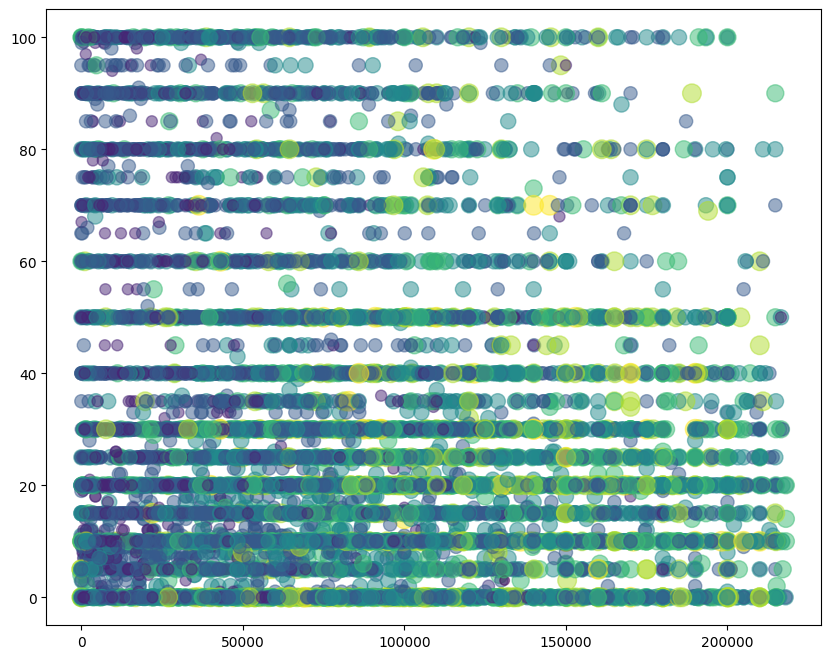

In [69]:
plt.figure(figsize=(10,8))
plt.scatter(jobs['ConvertedCompYearly'], jobs['JobSatPoints_6'], s=jobs['Age'] * 3, alpha=0.5, c=jobs['Age'], cmap='viridis')
plt.show()

#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


In [84]:
lang = df[['LanguageHaveWorkedWith','JobSatPoints_6']].dropna()
languages = lang['LanguageHaveWorkedWith'].str.split(';').explode()
top_22 = languages.value_counts().head(22).index
top_22

Index(['JavaScript', 'SQL', 'HTML/CSS', 'Python', 'TypeScript',
       'Bash/Shell (all shells)', 'Java', 'C#', 'C++', 'PHP', 'C',
       'PowerShell', 'Go', 'Rust', 'Kotlin', 'Ruby', 'Dart', 'Lua', 'Swift',
       'Visual Basic (.Net)', 'Assembly', 'Groovy'],
      dtype='object', name='LanguageHaveWorkedWith')

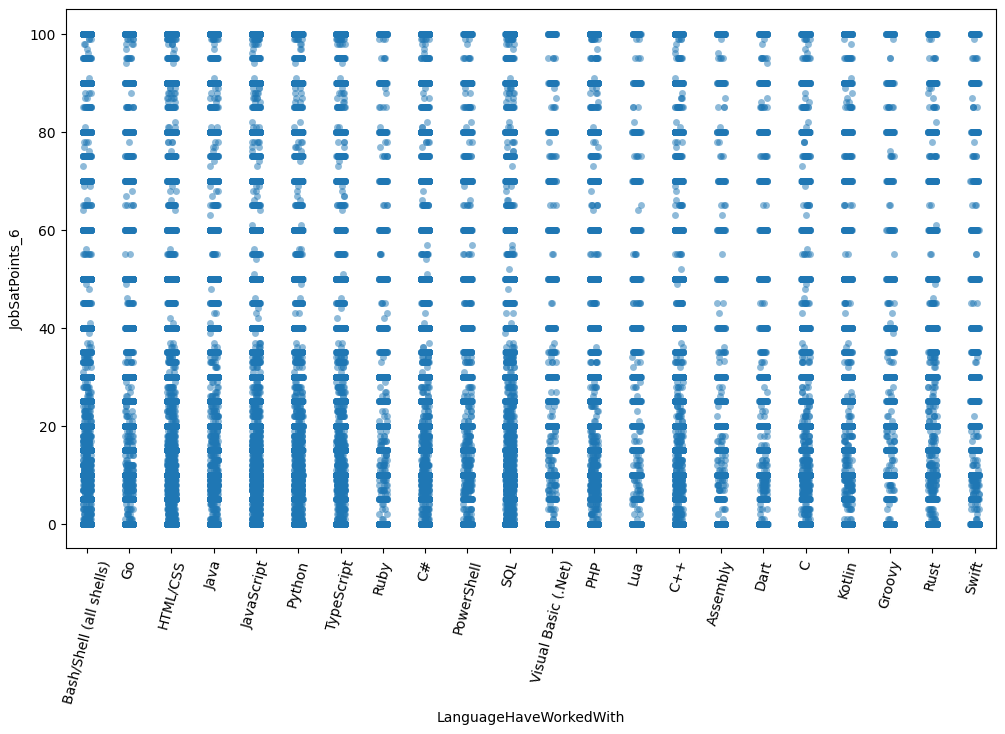

In [ ]:
lang_exploded = pd.DataFrame({
    "LanguageHaveWorkedWith": languages,
    "JobSatPoints_6": lang['JobSatPoints_6'].repeat(lang['LanguageHaveWorkedWith'].str.split(';').apply(len))
}).reset_index(drop=True)

lang_top = lang_exploded[lang_exploded['LanguageHaveWorkedWith'].isin(top_22)]

plt.figure(figsize=(12, 7))
sns.stripplot(data=lang_top, x='LanguageHaveWorkedWith', y='JobSatPoints_6', jitter=True, alpha=0.5)
plt.xticks(rotation=75)
plt.show()


### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


In [94]:
con = df[['ConvertedCompYearly', 'JobSatPoints_6', 'Employment']].dropna()

Q1 = con['ConvertedCompYearly'].quantile(0.25)
Q2 = con['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
con_iqr = con[(con['ConvertedCompYearly'] >= lower) & (con['ConvertedCompYearly'] <= upper)]

con_exp = con_iqr.assign(Employment=con_iqr['Employment'].str.split(';')).explode('Employment')

con_exp['Employment'] = con_exp['Employment'].str.strip()

con_exp

,ConvertedCompYearly,JobSatPoints_6,Employment
72,7322.0,65.0,"Employed, full-time"
72,7322.0,65.0,"Student, full-time"
72,7322.0,65.0,"Independent contractor, freelancer, or self-em..."
72,7322.0,65.0,"Employed, part-time"
379,91295.0,0.0,"Employed, full-time"
...,...,...,...
41178,9711.0,80.0,"Employed, full-time"
41180,44640.0,0.0,"Employed, full-time"
41184,170000.0,20.0,"Employed, full-time"
41186,12000.0,20.0,"Student, full-time"


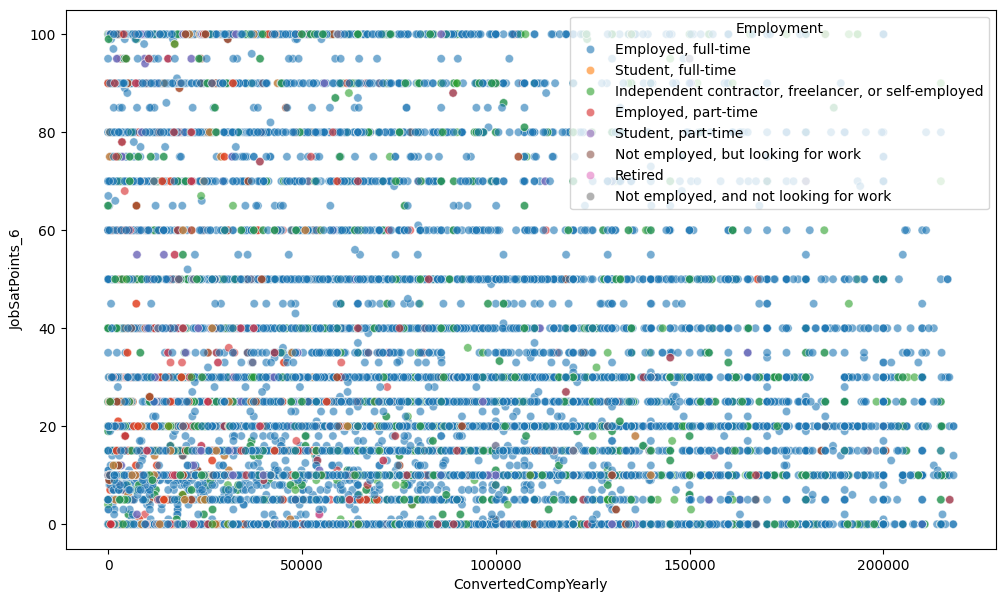

In [95]:
plt.figure(figsize=(12,7))
sns.scatterplot(
    data=con_exp,
    x='ConvertedCompYearly',
    y='JobSatPoints_6',
    hue='Employment',
    alpha=0.6)
plt.show()

#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


In [107]:
def get_year(year):
    if year == 'More than 50 years':
        return 52
    elif year == 'Less than 1 year':
        return 0
    else:
        try:
            return int(year)
        except:
            return 0
        
mapping = {
    'United Kingdom of Great Britain and Northern Ireland': 'UK',
    'United States of America': 'US',
    'Central African Republic': 'CF',
    'Bosnia and Herzegovina': 'BA',
    'United Arab Emirates': 'AE'
}

In [118]:
exp_age = df[['YearsCodePro', 'Age', 'Country']].dropna()
# exp_age['Age'] = exp_age['Age'].apply(get_age)
exp_age['YearsCodePro'] = exp_age['YearsCodePro'].apply(get_year)
exp_age['Country'] = exp_age['Country'].replace(mapping)
top_5 = exp_age['Country'].value_counts().head().index
exp_age_top_5 = exp_age[exp_age['Country'].isin(top_5)]
exp_age_top_5

,YearsCodePro,Age,Country
1,17,35-44 years old,UK
2,27,45-54 years old,UK
6,7,35-44 years old,US
12,12,35-44 years old,US
17,3,18-24 years old,India
...,...,...,...
65339,2,18-24 years old,India
65353,11,25-34 years old,UK
65371,2,25-34 years old,Germany
65428,7,25-34 years old,India


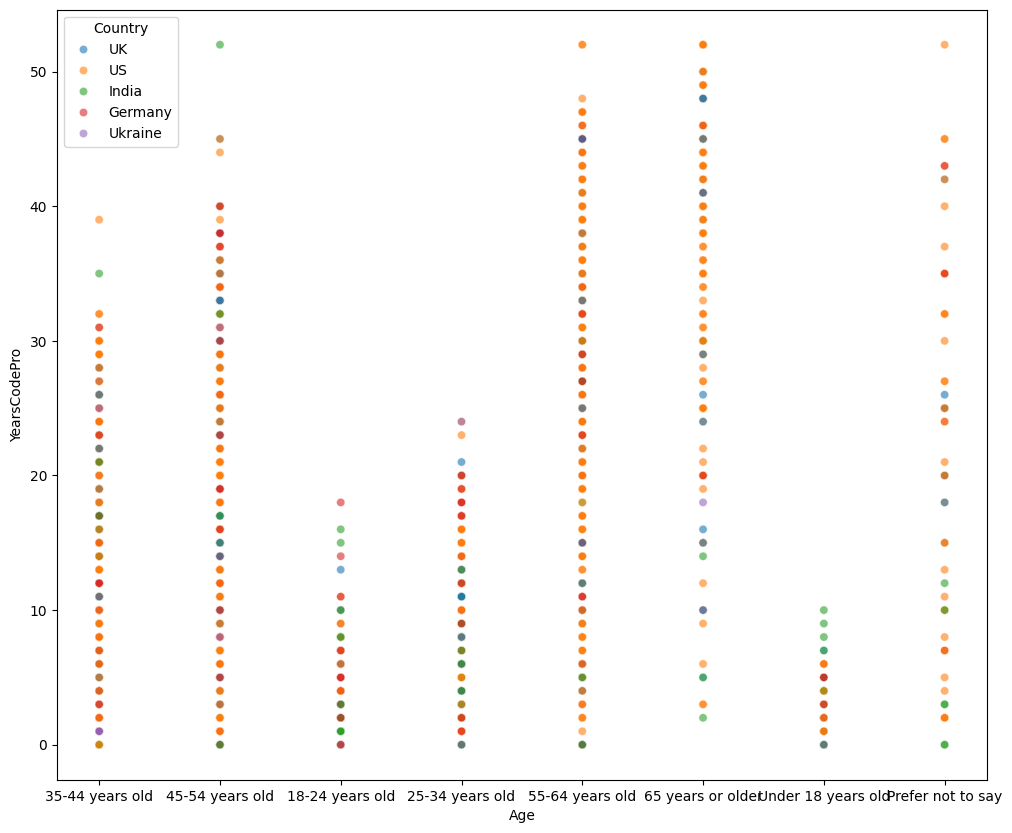

In [126]:
plt.figure(figsize=(12,10))
sns.scatterplot(
    data=exp_age_top_5,
    x='Age',
    y='YearsCodePro',
    hue='Country',
    alpha=0.6
)
plt.show()

### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
